     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

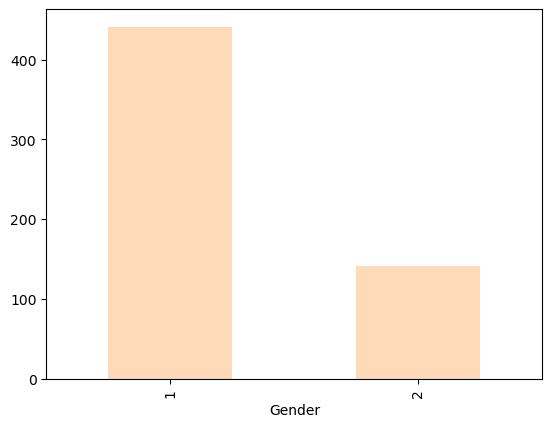

Axes(0.125,0.11;0.775x0.77)


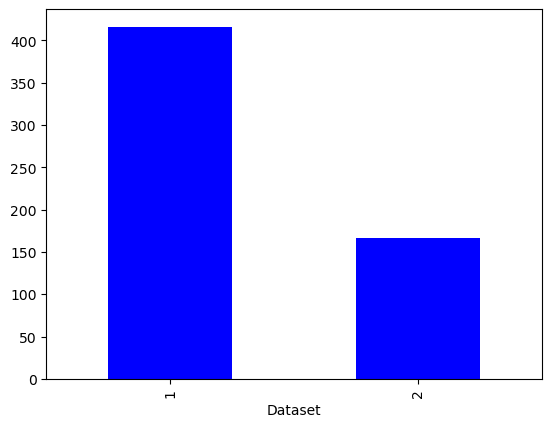

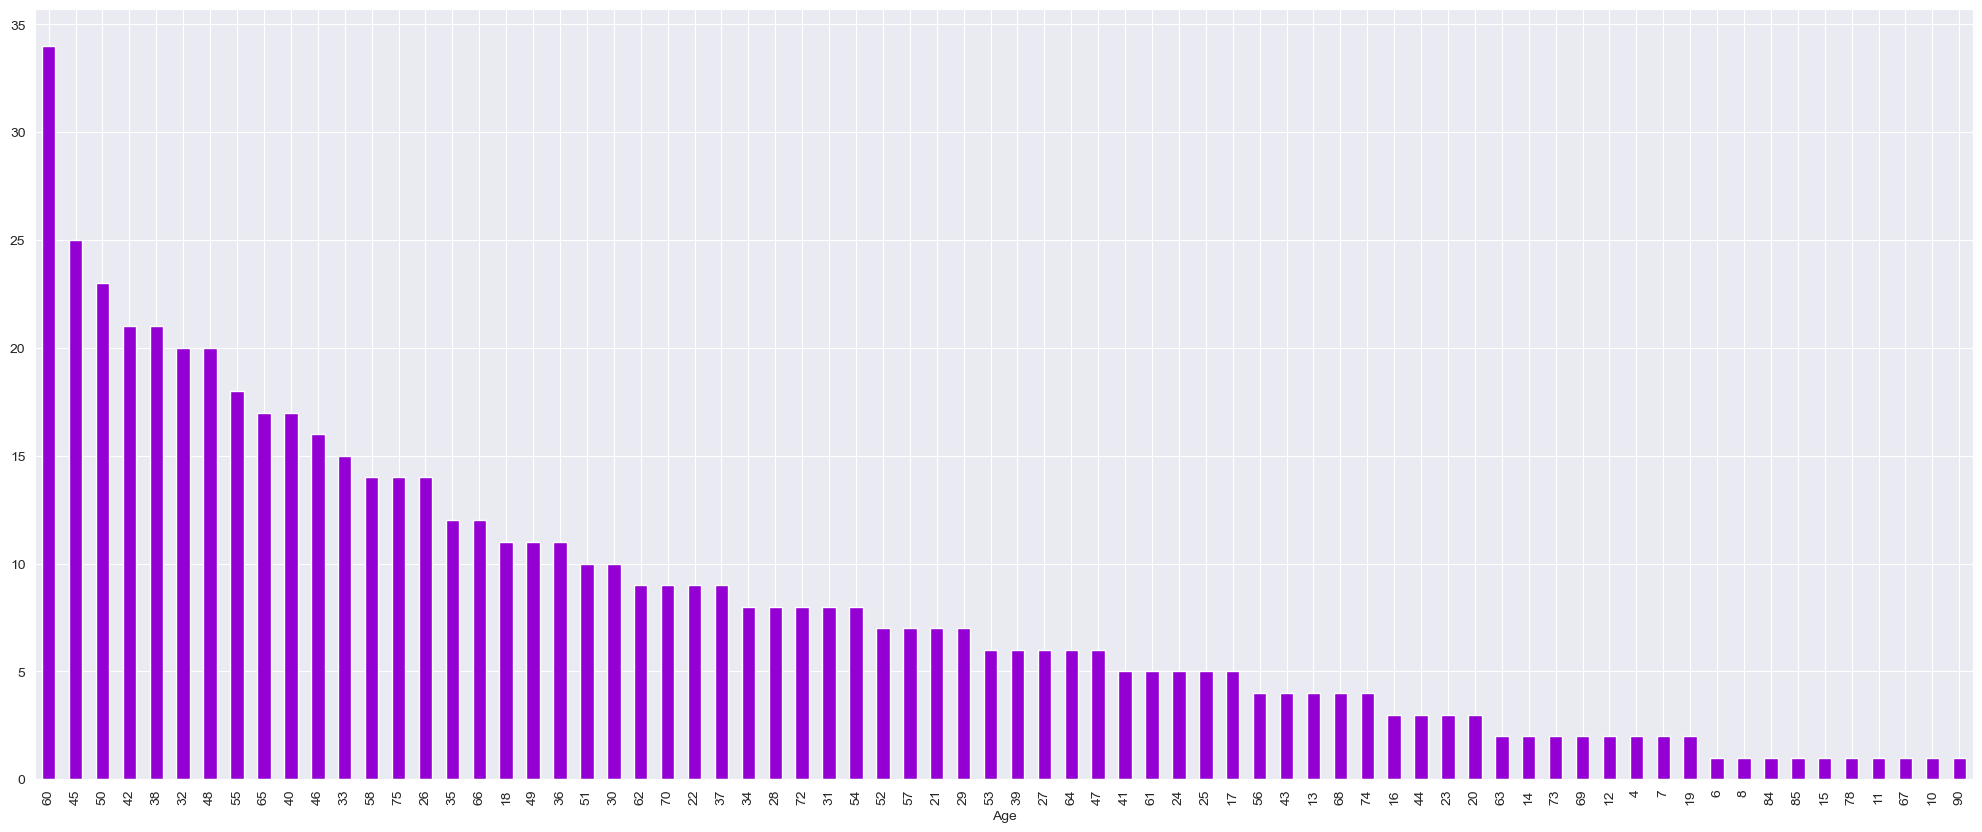

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       2              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('D:/Projects/indian_liver_patient.csv')
print(df)

print(df.head(10))

df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 2)

print(df.isnull().sum())

print(df['Albumin_and_Globulin_Ratio'].mean())
df=df.fillna(0.94)

print(df.isnull().sum())

print(df.describe())

print(df['Gender'].value_counts().plot.bar(color='peachpuff'))
plt.show()

print(df['Dataset'].value_counts().plot.bar(color='blue'))
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Age'].value_counts().plot.bar(color='darkviolet')
plt.show()

X = df.drop(columns='Dataset', axis=1)
#Y = patients['Dataset'].apply(lambda y_value: 1 if y_value==1 else 0)
Y = df['Dataset']
print(X)
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

print(Y.shape, Y_train.shape, Y_test.shape)

import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

input_data = (60,1,0.9,0.3,168,16,24,6.7,3,0.8)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 2):
  print('The Person does not have a Liver Disease')
else:
  print('The Person has Liver Disease') 
